In [68]:
!pip install bokeh
!pip install seaborn
!pip install wordcloud

Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple, https://artifact.intuit.com/artifactory/api/pypi/pypi-local-data-science/simple
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple, https://artifact.intuit.com/artifactory/api/pypi/pypi-local-data-science/simple
  Using cached https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/packages/packages/70/bd/5e6bf595fe6ee0f257ae49336dd180768c1ed3d7c7155b2fdf894c1c808a/seaborn-0.10.0-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple, https://artifact.intuit.com/artifactory/api/pypi/pypi-local-data-science/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")
column_rename = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}
terrorism_df.rename(columns=column_rename,inplace=True)
terrorism_df = terrorism_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [23]:
required_cols = ['Year', 'Country', 'Region', 'Weapon_type', 'Killed', 'Wounded']
terrorism_df = terrorism_df.dropna(subset=required_cols)
terrorism_df['total_effected'] = terrorism_df['Killed'] + terrorism_df['Wounded']

In [24]:
print(terrorism_df.shape)

(164817, 18)


In [25]:
terrorism_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,total_effected
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0


In [26]:
terrorism_df['Country'].value_counts()[:20]

Iraq              23306
Pakistan          13871
Afghanistan       11952
India             11490
Colombia           7697
Philippines        6585
Peru               5385
Turkey             4132
El Salvador        3890
Thailand           3807
United Kingdom     3509
Somalia            3115
Spain              2942
Yemen              2916
Nigeria            2894
Sri Lanka          2892
United States      2742
Algeria            2629
France             2502
Egypt              2428
Name: Country, dtype: int64

In [27]:
terrorism_df['Region'].value_counts()

Middle East & North Africa     46749
South Asia                     42989
South America                  17063
Sub-Saharan Africa             14323
Western Europe                 14070
Southeast Asia                 11993
Central America & Caribbean     7841
Eastern Europe                  4877
North America                   3332
East Asia                        755
Central Asia                     552
Australasia & Oceania            273
Name: Region, dtype: int64

In [28]:
terrorism_df['Weapon_type'].value_counts()

Explosives                                                                     86365
Firearms                                                                       51882
Unknown                                                                        12123
Incendiary                                                                     10297
Melee                                                                           3390
Chemical                                                                         302
Sabotage Equipment                                                               137
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      133
Other                                                                            109
Fake Weapons                                                                      33
Biological                                                                        32
Radiological                                                     

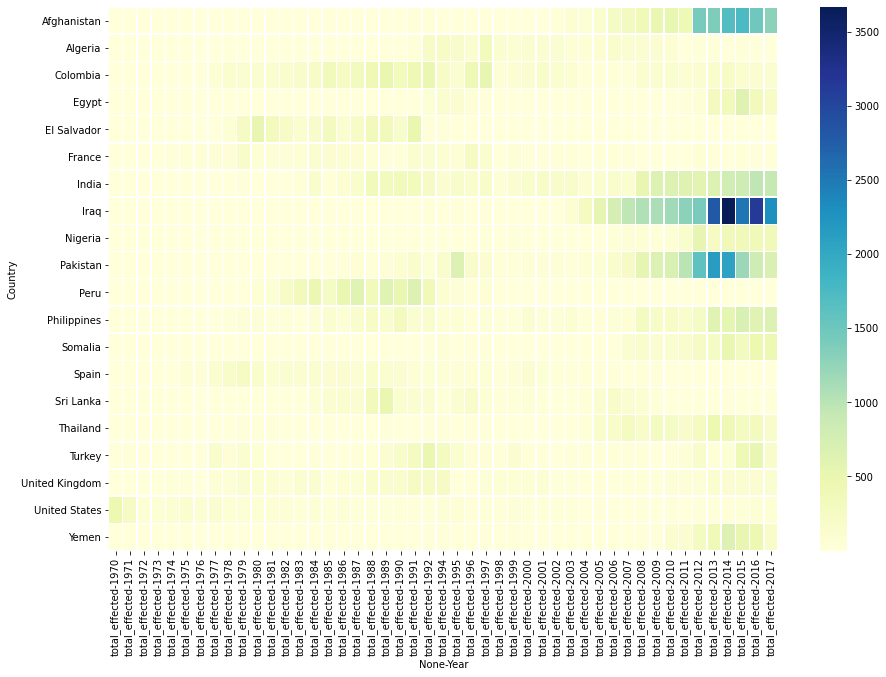

In [29]:
top_countries = list(terrorism_df['Country'].value_counts()[:20].keys())
terror_filter = terrorism_df[terrorism_df['Country'].isin(top_countries)]
terror_filter = terror_filter[['Country', 'Year', 'total_effected']].groupby(['Country','Year']).count().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter, cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

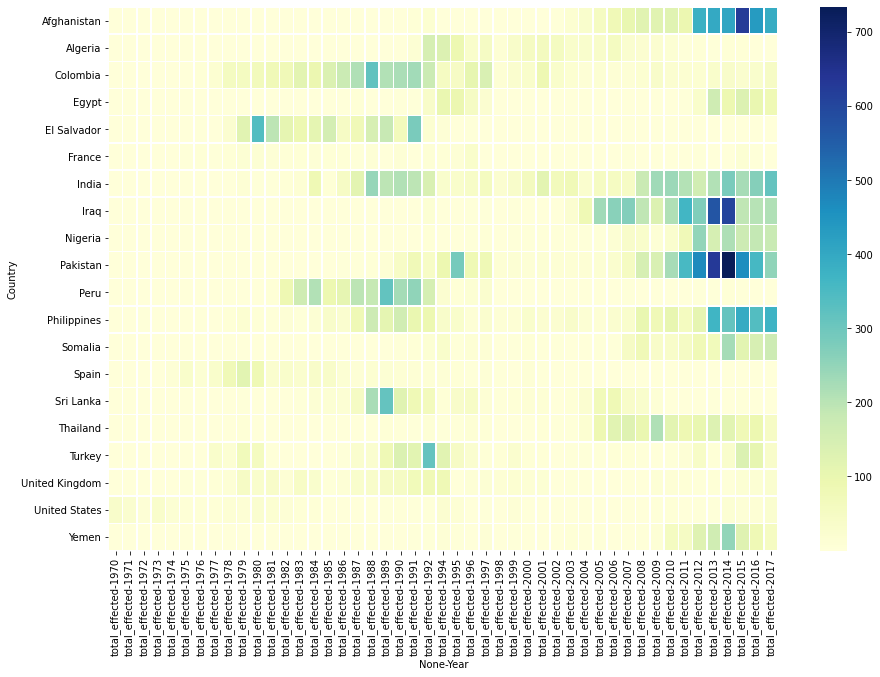

In [30]:
terror_filter = terrorism_df[terrorism_df['Country'].isin(top_countries)]
terror_filter = terror_filter[terror_filter['Weapon_type'] == 'Firearms']
terror_filter = terror_filter[['Country', 'Year', 'total_effected']].groupby(['Country','Year']).count().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter, cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

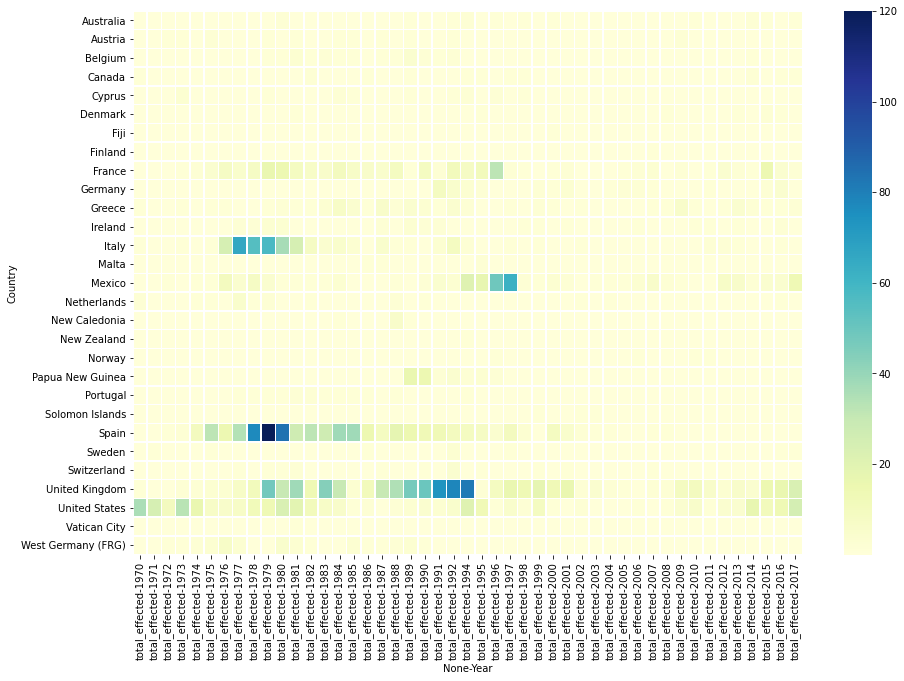

In [31]:
terror_filter = terrorism_df[terrorism_df['Region'].isin({'North America', 'Western Europe', 
                                                          'Australasia & Oceania'})]
terror_filter = terror_filter[terror_filter['Weapon_type'] == 'Firearms']
terror_filter = terror_filter[['Country', 'Year', 'total_effected']].groupby(['Country','Year']).count().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter, cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

In [32]:
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'total_effected'],
      dtype='object')

In [33]:
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

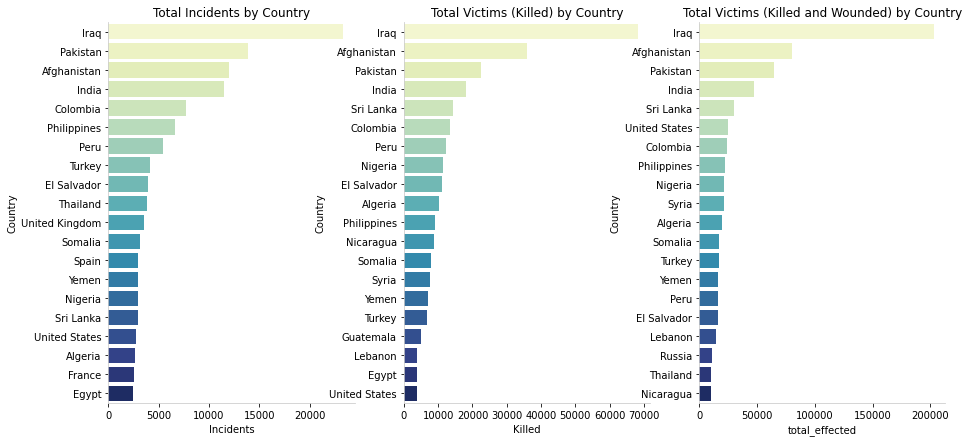

In [34]:
# Data Prep
country_incidents = terrorism_df.groupby(by='Country', as_index=False)['Year'].count() \
    .sort_values(by='Year', ascending=False)
country_incidents = country_incidents.rename(columns={'Year': 'Incidents'})
country_incidents = country_incidents.iloc[:20, :]

country_killed = terrorism_df.groupby(by='Country', as_index=False).sum().sort_values(
    by='Killed', ascending=False).loc[:, ['Country', 'Killed']]
country_killed = country_killed.iloc[:20, :]

country_victims = terrorism_df.groupby(by='Country', as_index=False).sum().sort_values(
    by='total_effected', ascending=False).loc[:, ['Country', 'total_effected']]
country_victims = country_victims.iloc[:20, :]

# Plot 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
sns.barplot(x='Incidents', y='Country', data=country_incidents, ci=None,
                 palette='YlGnBu', ax=axs[0])
sns.barplot(x='Killed', y='Country', data=country_killed, ci=None,
                 palette='YlGnBu', ax=axs[1])
sns.barplot(x='total_effected', y='Country', data=country_victims, ci=None,
                 palette='YlGnBu', ax=axs[2])

format_spines(axs[0], right_border=False)
format_spines(axs[1], right_border=False)
format_spines(axs[2], right_border=False)

axs[0].set_title('Total Incidents by Country')
axs[1].set_title('Total Victims (Killed) by Country')
axs[2].set_title('Total Victims (Killed and Wounded) by Country')

# axs[0].set_ylabel('')
# axs[1].set_ylabel('')
# axs[2].set_ylabel('')

# for p in axs[0].patches:
#     width = p.get_width()
#     axs[0].text(width-4000, p.get_y() + p.get_height() / 2. + 0.10, '{}'.format(int(width)), 
#             ha="center", color='white')

# for p in axs[1].patches:
#     width = p.get_width()
#     axs[1].text(width-300, p.get_y() + p.get_height() / 2. + 0.10, '{}'.format(int(width)), 
#             ha="center", color='white')

plt.show()